In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import imageio

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

9


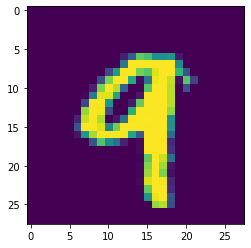

In [3]:
ix = random.randint(0, len(x_train)-1)
plt.imshow(x_train[ix])
print(y_train[ix])

In [4]:
# Visualization utilities
plt.rc('font', size=20)
plt.rc('figure', figsize=(15, 3))

def display_predictions_in_callback(inputs, outputs, ground_truth, epoch, n=10):
    plt.clf()

    plt.yticks([])
    plt.grid(None)
    inputs = np.reshape(inputs, [n, 28, 28])

    ## To align the n images horizontally
    inputs = np.swapaxes(inputs, 0, 1)
    inputs = np.reshape(inputs, [28, 28*n])

    plt.imshow(inputs)
    plt.xticks([28*x+14 for x in range(n)], outputs) # to display y-label with output labels 
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if outputs[i] == ground_truth[i]: 
            t.set_color('green') 
        else: 
            t.set_color('red')
    plt.grid(None)
    


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [11]:
giff_path = r'D:\Achyuth\\animation.gif'


In [41]:
import io
class Visualizecallback(tf.keras.callbacks.Callback):
    def __init__(self, inputs, groundtruth, freq=5, samples_to_display=10):
        self.images = []
        self.inputs = inputs
        self.ground_truth = groundtruth
        self.freq = freq
        self.samples_to_display = samples_to_display
    def on_epoch_end(self, epoch, logs=None):
        ix = np.random.choice(len(self.inputs), self.samples_to_display)
        x_test, y_test = self.inputs[ix], self.ground_truth[ix]
        predictions = np.argmax(self.model.predict(x_test), axis=1)
        
        display_predictions_in_callback(x_test, predictions, y_test, epoch, self.samples_to_display)
        
        # saving image
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        self.images.append(np.array(image))
        
        # displaying the predictions for only epochs divisible by 5
        if epoch % self.freq == 0:
            plt.show()
            
    def on_train_end(self, logs=None):
        print(len(self.images))
#         imageio.imwrite(giff_path, self.images, fps=0.1)
        

In [42]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='linear', input_dim=784))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [43]:
model = get_model()
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples
Epoch 1/5
59936/60000 [============================>.] - ETA: 0s - loss: 0.6493 - accuracy: 0.8257

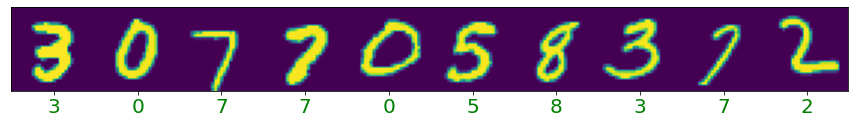

60000/60000 [==============================] - 6s 98us/sample - loss: 0.6490 - accuracy: 0.8258
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3468 - accuracy: 0.9022s - loss: 0.3468 - accuracy: 0.90 - ETA: 0s - loss: 0.347
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3143 - accuracy: 0.9109s - loss: 0.3393 - accuracy: 0.90
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3005 - accuracy: 0.9152
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2926 - accuracy: 0.9181
5


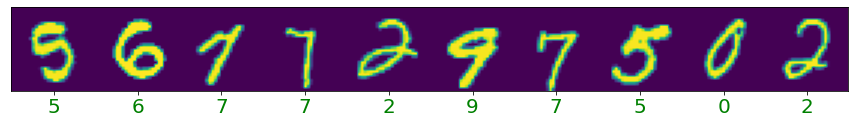

In [44]:
model.fit(x_train, y_train,
          batch_size=16,
          epochs=5,
          callbacks=[Visualizecallback(x_test, y_test)])


## IGNORE

[9883, 23679, 12048, 57882, 22665, 29752, 1795, 12821, 57947, 9107]
[4 0 7 0 6 9 5 5 5 3]
(28, 10, 28)
(28, 280)


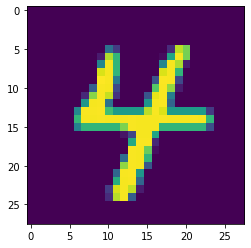

In [31]:
x = x_train.reshape(60000, 784)
# random_nums = np.random.choice(60000, 10)
random_nums = [9883,23679,12048, 57882, 22665, 29752 , 1795, 12821, 57947 , 9107]
print(random_nums)
x_test = x[random_nums]
print(y_train[random_nums])
inp = np.reshape(x_test, [10, 28, 28])

## To align the n images horizontally
inputs = np.swapaxes(inp, 0, 1)
print(inputs.shape)
inputs = np.reshape(inputs, [28, 28*10])

print(inputs.shape)
plt.imshow(inp)
# plt.xticks([28*x+14 for x in range(10)], [5, 6, 12, 12,3,4, 1,3,4, 3])
# for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
#     if 1 == 2: 
#         t.set_color('green') 
#     else: 
#         t.set_color('red')

# plt.rc('font', size=10)
# plt.rc('figure', figsize=(15, 3))
# plt.grid(None)
# plt.imshow(inp)